In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeansimport matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:

df = pd.read_csv("netflix_users.csv")
print(df.head())

   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  
0          Drama  2024-05-12  
1         Sci-Fi  2025-02-05  
2         Comedy  2025-01-24  
3    Documentary  2024-03-25  
4          Drama  2025-01-14  


In [67]:
df.set_index("User_ID", inplace=True)

In [68]:
df.isna().sum()

Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

In [69]:
df.columns

Index(['Name', 'Age', 'Country', 'Subscription_Type', 'Watch_Time_Hours',
       'Favorite_Genre', 'Last_Login'],
      dtype='object')

In [70]:
df.describe()

,Age,Watch_Time_Hours
count,25000.000000,25000.000000
mean,46.482880,500.468858
std,19.594861,286.381815
min,13.000000,0.120000
25%,29.000000,256.567500
50%,46.000000,501.505000
75%,63.000000,745.732500
max,80.000000,999.990000


In [71]:
df.shape

(25000, 7)

In [72]:
df.size

175000

In [73]:
X = pd.get_dummies(df, drop_first=True)
X

,Age,Watch_Time_Hours,Name_Alex Davis,Name_Alex Garcia,Name_Alex Hernandez,Name_Alex Johnson,Name_Alex Jones,Name_Alex Martinez,Name_Alex Miller,Name_Alex Smith,...,Last_Login_2025-02-27,Last_Login_2025-02-28,Last_Login_2025-03-01,Last_Login_2025-03-02,Last_Login_2025-03-03,Last_Login_2025-03-04,Last_Login_2025-03-05,Last_Login_2025-03-06,Last_Login_2025-03-07,Last_Login_2025-03-08
User_ID,,,,,,,,,,,,,,,,,,,,,
1,18,80.26,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,23,321.75,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,60,35.89,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,44,261.56,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,68,909.30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,18,183.88,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24997,17,112.37,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24998,14,351.80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [88]:
df.head()

,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,cluster
User_ID,,,,,,,,
1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,1
2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,1
3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,1
4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,1
5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,1


In [89]:
print(df['cluster'].value_counts())

cluster
1    24393
2      304
0      303
Name: count, dtype: int64


In [90]:
summary = df.groupby("cluster").agg({
    "Age": "mean",
    "Watch_Time_Hours": "mean",
    "Subscription_Type": lambda x: x.value_counts().index[0],  # most common
    "Country": lambda x: x.value_counts().index[0],            # most common
    "Favorite_Genre": lambda x: x.value_counts().index[0],
    "Last_Login": "max"  # or min, depending on what you need
})
print(summary)

               Age  Watch_Time_Hours Subscription_Type Country Favorite_Genre  \
cluster                                                                         
0        44.778878        499.025941             Basic  Canada        Romance   
1        46.499529        500.707874           Premium      UK         Horror   
2        46.845395        482.728355           Premium  Brazil         Action   

         Last_Login  
cluster              
0        2025-03-06  
1        2025-03-08  
2        2025-03-08  


In [91]:
print(df['cluster'].value_counts())

cluster
1    24393
2      304
0      303
Name: count, dtype: int64


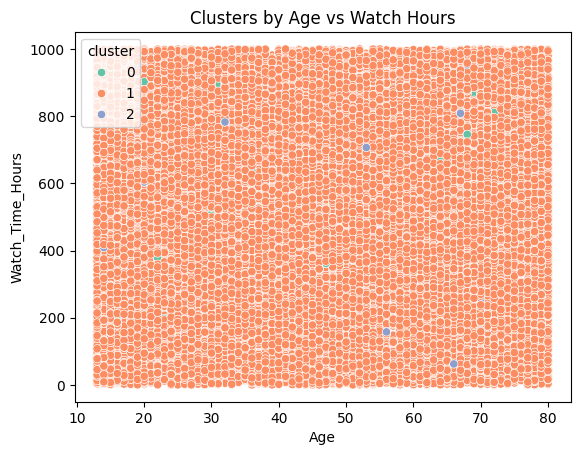

In [104]:
sns.scatterplot(data=df, x="Age", y="Watch_Time_Hours", hue="cluster", palette="Set2")
plt.title("Clusters by Age vs Watch Hours")
plt.show()

In [122]:
X = df.copy()

In [123]:
X_scaled = scaler.fit_transform(df[["Age", "Watch_Time_Hours"]])
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [124]:
print(df['cluster'].value_counts())

cluster
1    5977
3    5806
2    4620
0    4355
4    4242
Name: count, dtype: int64


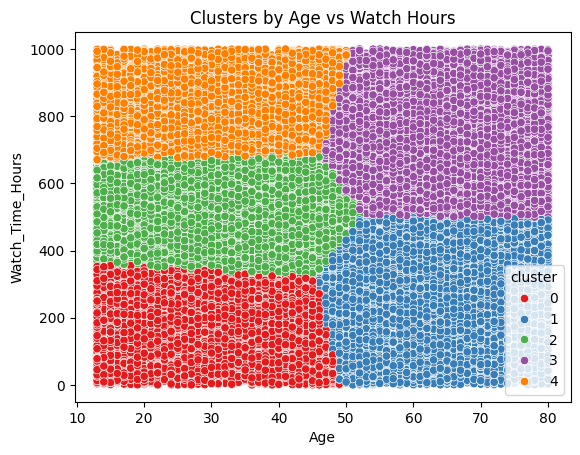

In [125]:
sns.scatterplot(data=df, x="Age", y="Watch_Time_Hours", hue="cluster", palette="Set1")
plt.title("Clusters by Age vs Watch Hours")
plt.show()

In [126]:
summary = df.groupby("cluster").agg({
    "Age": "mean",
    "Watch_Time_Hours": "mean",
    "Subscription_Type": lambda x: x.value_counts().index[0],  
    "Country": lambda x: x.value_counts().index[0],           
    "Favorite_Genre": lambda x: x.value_counts().index[0],
    "Last_Login": "max"  
})
print(summary)

               Age  Watch_Time_Hours Subscription_Type Country Favorite_Genre  \
cluster                                                                         
0        29.503559        169.098873           Premium   India    Documentary   
1        63.903463        252.241143          Standard      UK         Horror   
2        31.507576        510.986649          Standard     USA         Comedy   
3        64.850499        747.639344           Premium  Brazil          Drama   
4        30.538897        840.664356             Basic  Canada        Romance   

         Last_Login  
cluster              
0        2025-03-08  
1        2025-03-08  
2        2025-03-08  
3        2025-03-08  
4        2025-03-08  
